# Introduction
This project is dedicated to Code Bridge. We will be exploring data sourced from the NYC Department of Parks and Recreation, which provided data about street tree planting during the years 2016-2022. More information can be found with this link: https://www.nycgovparks.org/trees/street-tree-planting

 In an effort to grow a ‘greener’ New York City, the New York City Department of Parks and recreation has attempted to turn its concrete jungle into ‘urban forests’ by planting trees throughout various boroughs of NYC. All plantings are within the city-owned public right of way. The data analyzed is sourced from reports from the New York City Tree Work Hub, which provided data about street tree planting in several different New York neighborhoods. With this data, we wanted to focus on creating a site that would provide the user with a simple and interesting way to retrieve the following information: (1) the overall distribution of trees planted in each borough, (2) the status of whether or not the scheduled planting was completed or still pending and (3) provide a visualization of boroughs that are greener based on the number of trees in each borough. The user will be able to use the map to locate boroughs in NYC that are greener versus those that still need more work.

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import folium
import geopandas
import folium
from folium.plugins import HeatMap
import sys
import webbrowser
import branca.colormap as cm
import geoplot
import matplotlib.pyplot as plt


# Data Preprocessing

In [2]:
print(sys.setrecursionlimit(5000))

None


In [3]:
trees=pd.read_csv('street_tree_planting.csv',  skiprows= 7, parse_dates=([9,14]))


In [4]:
trees.head(50)



,lng,lat,Borough,ZipCode,BuildingNumber,StreetName,FiscalYear,PlantingSpaceID,CommunityBoard,PlantingSeason,CityCouncil,TreeID,WOId,WOStatus,CompletedDate
0,-73.709503,40.740340,Queens,11004,82-030,260 STREET,0,148027,413,2022-05-31,23,114029,15525248,Completed,2021-12-07
1,-73.954008,40.814634,Manhattan,10027,464,WEST 129 STREET,0,156427,109,2022-05-31,7,0,16644663,Not Completed,NaT
2,-73.712984,40.735428,Queens,11001,254-04,84 ROAD,0,177638,413,2022-05-31,23,142438,8573730,Completed,2021-12-07
3,-73.957912,40.815443,Manhattan,0,567,DR M L KING JR BOULEVARD,0,216545,109,2022-05-31,0,183762,13809561,Not Completed,NaT
4,-73.894586,40.729696,Queens,11378,69-26,53 DRIVE,0,200074,405,2022-05-31,30,163302,6529475,Completed,2022-05-25
5,-73.876284,40.828165,Bronx,10472,1155,MANOR AVENUE,0,191641,209,2022-05-31,18,0,14343624,Not Completed,NaT
6,-73.952187,40.799678,Manhattan,10026,37,MALCOLM X BOULEVARD,0,178031,110,2022-05-31,9,143233,9138879,Not Completed,NaT
7,-73.939272,40.819268,Manhattan,10030,143,WEST 142 STREET,0,226994,110,2022-05-31,9,0,9364010,Not Completed,NaT
8,-74.000114,40.738817,Manhattan,10011,211,WEST 14 STREET,0,242806,104,2022-05-31,3,207143,13402269,Not Completed,NaT
9,-73.954879,40.801625,Manhattan,10026,230,WEST 113 STREET,0,239616,110,2022-05-31,9,0,18029582,Not Completed,NaT


In [5]:
trees.columns=trees.columns.str.lower()


In [6]:
trees.columns

Index(['lng', 'lat', 'borough', 'zipcode', 'buildingnumber', 'streetname',
       'fiscalyear', 'plantingspaceid', 'communityboard', 'plantingseason',
       'citycouncil', 'treeid', 'woid', 'wostatus', 'completeddate'],
      dtype='object')

In [7]:
trees.columns
trees=trees.rename(columns={'buildingnumber':"building_number",'streetname':"street_name", 'fiscalyear':"fiscal_year", "plantingspaceid":"planting_space_id", "communityboard":"community_board", "plantingseason": "planting_season", "citycouncil":"city_council", "treeid":"tree_id", "woid":"wo_id", "wostatus": "wo_status", "completeddate":"completed_date"})


In [8]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8078 entries, 0 to 8077
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   lng                8078 non-null   float64       
 1   lat                8078 non-null   float64       
 2   borough            8078 non-null   object        
 3   zipcode            8078 non-null   int64         
 4   building_number    8044 non-null   object        
 5   street_name        8078 non-null   object        
 6   fiscal_year        8078 non-null   int64         
 7   planting_space_id  8078 non-null   int64         
 8   community_board    8078 non-null   int64         
 9   planting_season    8078 non-null   datetime64[ns]
 10  city_council       8078 non-null   int64         
 11  tree_id            8078 non-null   int64         
 12  wo_id              8078 non-null   int64         
 13  wo_status          8078 non-null   object        
 14  complete

In [9]:
trees['fiscal_year'].value_counts()

0    8078
Name: fiscal_year, dtype: int64

In [10]:
#dropping the fiscal year column because all values are 0 and would not be useful for analysis
trees=trees.drop(["fiscal_year"], axis=1)

In [11]:
trees["zipcode"].value_counts()

10469    266
11413    232
10027    226
10466    217
11212    181
        ... 
11367      1
10282      1
10017      1
11374      1
11360      1
Name: zipcode, Length: 170, dtype: int64

In [12]:
trees.isna().sum()

lng                     0
lat                     0
borough                 0
zipcode                 0
building_number        34
street_name             0
planting_space_id       0
community_board         0
planting_season         0
city_council            0
tree_id                 0
wo_id                   0
wo_status               0
completed_date       2090
dtype: int64

In [13]:
trees["wo_status"].value_counts()

Completed        5988
Not Completed    2090
Name: wo_status, dtype: int64

In [14]:
#Will drop rows in Building Number Column 

In [15]:
trees["borough"].value_counts()

Brooklyn         2435
Queens           2255
Bronx            1517
Manhattan        1503
Staten Island     368
Name: borough, dtype: int64

In [16]:
trees['planting_season'].value_counts()

2022-05-31    8078
Name: planting_season, dtype: int64

In [17]:
print(trees["planting_season"].min())
print(trees["planting_season"].max())

2022-05-31 00:00:00
2022-05-31 00:00:00


In [18]:
trees=trees.drop(['planting_season'], axis=1)

Above, I removed the planting season column because there is just one value-All trees were planted in May 2022, so this is not useful for analysis.

In [19]:
trees.head()

,lng,lat,borough,zipcode,building_number,street_name,planting_space_id,community_board,city_council,tree_id,wo_id,wo_status,completed_date
0,-73.709503,40.740340,Queens,11004,82-030,260 STREET,148027,413,23,114029,15525248,Completed,2021-12-07
1,-73.954008,40.814634,Manhattan,10027,464,WEST 129 STREET,156427,109,7,0,16644663,Not Completed,NaT
2,-73.712984,40.735428,Queens,11001,254-04,84 ROAD,177638,413,23,142438,8573730,Completed,2021-12-07
3,-73.957912,40.815443,Manhattan,0,567,DR M L KING JR BOULEVARD,216545,109,0,183762,13809561,Not Completed,NaT
4,-73.894586,40.729696,Queens,11378,69-26,53 DRIVE,200074,405,30,163302,6529475,Completed,2022-05-25


In [20]:
trees["tree_id"].value_counts()

0           1418
12905123       2
2138756        2
12885028       2
12885311       2
            ... 
12877063       1
12838133       1
12838132       1
12877062       1
12839652       1
Name: tree_id, Length: 6654, dtype: int64

In [21]:
trees["wo_id"]


0       15525248
1       16644663
2        8573730
3       13809561
4        6529475
          ...   
8073    14250323
8074    14250314
8075    16767123
8076    18690779
8077    18690781
Name: wo_id, Length: 8078, dtype: int64

In [22]:
trees['tree_id'].value_counts()

0           1418
12905123       2
2138756        2
12885028       2
12885311       2
            ... 
12877063       1
12838133       1
12838132       1
12877062       1
12839652       1
Name: tree_id, Length: 6654, dtype: int64

In [23]:
trees=trees.query('tree_id != 0')
trees[trees['tree_id'] == 0]
trees["tree_id"].value_counts()
trees.isna().sum()

lng                    0
lat                    0
borough                0
zipcode                0
building_number       34
street_name            0
planting_space_id      0
community_board        0
city_council           0
tree_id                0
wo_id                  0
wo_status              0
completed_date       759
dtype: int64

In [24]:
trees["building_number"].value_counts()
trees[trees["building_number"].isna()]


,lng,lat,borough,zipcode,building_number,street_name,planting_space_id,community_board,city_council,tree_id,wo_id,wo_status,completed_date
133,-73.990975,40.736163,Manhattan,10003,NaN,Union Square Park,1584913,105,2,1411148,9625932,Not Completed,NaT
939,-73.981301,40.787073,Manhattan,10024,NaN,Riverside Park,2342559,107,6,2145808,10420063,Not Completed,NaT
2066,-73.973933,40.641736,Brooklyn,11218,NaN,Ocean Parkway Malls,1218869,312,39,12788132,14239154,Completed,2022-04-20
2068,-73.973972,40.641452,Brooklyn,11218,NaN,Ocean Parkway Malls,1218735,312,39,12787671,14195737,Completed,2022-04-20
2077,-73.973613,40.639550,Brooklyn,11218,NaN,Ocean Parkway Malls,1218751,312,39,12793689,14195742,Completed,2022-04-21
2079,-73.973399,40.638932,Brooklyn,11218,NaN,Ocean Parkway Malls,1218834,312,39,12794096,14239600,Completed,2022-04-21
2084,-73.973255,40.637691,Brooklyn,11218,NaN,Ocean Parkway Malls,1219060,312,39,12794099,14196623,Completed,2022-04-21
2086,-73.973133,40.637032,Brooklyn,11218,NaN,Ocean Parkway Malls,1219056,312,39,12793693,14196722,Completed,2022-04-21
2095,-73.972412,40.633716,Brooklyn,11218,NaN,Ocean Parkway Malls,1218904,312,44,12796817,14247747,Completed,2022-04-22
2097,-73.972016,40.631645,Brooklyn,11230,NaN,Ocean Parkway Malls,1218775,314,44,12797737,14247756,Completed,2022-04-22


In [25]:
trees.dropna(subset=['building_number'], inplace=True)
trees['completed_date'].value_counts()

2022-05-18    352
2022-05-23    282
2022-05-24    263
2022-05-16    234
2022-05-09    234
             ... 
2021-12-09      1
2021-11-19      1
2021-12-27      1
2022-01-10      1
2021-12-20      1
Name: completed_date, Length: 125, dtype: int64

In [26]:
trees.isna().sum()

lng                    0
lat                    0
borough                0
zipcode                0
building_number        0
street_name            0
planting_space_id      0
community_board        0
city_council           0
tree_id                0
wo_id                  0
wo_status              0
completed_date       757
dtype: int64

Missing values found in completed_date can be logically associated with each row's corresponding "Not_Completed" value in the column wo_stautus.

In [27]:
trees["completed_date"].value_counts()

2022-05-18    352
2022-05-23    282
2022-05-24    263
2022-05-16    234
2022-05-09    234
             ... 
2021-12-09      1
2021-11-19      1
2021-12-27      1
2022-01-10      1
2021-12-20      1
Name: completed_date, Length: 125, dtype: int64

In [28]:
trees['wo_status'].value_counts()

Completed        5869
Not Completed     757
Name: wo_status, dtype: int64

# Graphing and Results

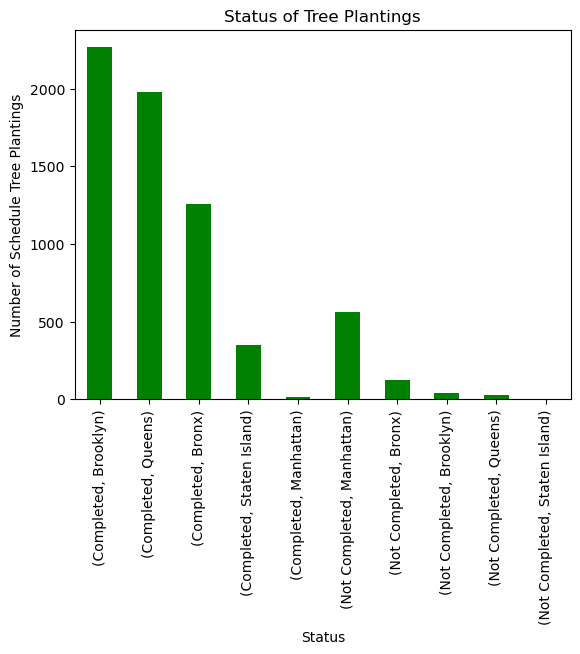

In [30]:
trees.groupby(["wo_status"])['borough'].value_counts().plot(kind='bar', color='green')
plt.title("Status of Tree Plantings")
plt.ylabel('Number of Schedule Tree Plantings')
plt.xlabel('Status')
plt.show()

In [31]:
trees["completed_month"]=pd.DatetimeIndex(trees["completed_date"]).month
#df['month'] = pd.DatetimeIndex(df['birth_date']).month

trees["completed_year"]=pd.DatetimeIndex(trees["completed_date"]).year
trees.head()


,lng,lat,borough,zipcode,building_number,street_name,planting_space_id,community_board,city_council,tree_id,wo_id,wo_status,completed_date,completed_month,completed_year
0,-73.709503,40.740340,Queens,11004,82-030,260 STREET,148027,413,23,114029,15525248,Completed,2021-12-07,12.0,2021.0
2,-73.712984,40.735428,Queens,11001,254-04,84 ROAD,177638,413,23,142438,8573730,Completed,2021-12-07,12.0,2021.0
3,-73.957912,40.815443,Manhattan,0,567,DR M L KING JR BOULEVARD,216545,109,0,183762,13809561,Not Completed,NaT,NaN,NaN
4,-73.894586,40.729696,Queens,11378,69-26,53 DRIVE,200074,405,30,163302,6529475,Completed,2022-05-25,5.0,2022.0
6,-73.952187,40.799678,Manhattan,10026,37,MALCOLM X BOULEVARD,178031,110,9,143233,9138879,Not Completed,NaT,NaN,NaN


In [32]:
trees['completed_date']=trees['completed_date'].fillna('Pending')
trees['completed_month']=trees['completed_month'].fillna('Pending')
trees['completed_year']=trees['completed_year'].fillna('Pending')



In [33]:
trees.head()

,lng,lat,borough,zipcode,building_number,street_name,planting_space_id,community_board,city_council,tree_id,wo_id,wo_status,completed_date,completed_month,completed_year
0,-73.709503,40.740340,Queens,11004,82-030,260 STREET,148027,413,23,114029,15525248,Completed,2021-12-07 00:00:00,12.0,2021.0
2,-73.712984,40.735428,Queens,11001,254-04,84 ROAD,177638,413,23,142438,8573730,Completed,2021-12-07 00:00:00,12.0,2021.0
3,-73.957912,40.815443,Manhattan,0,567,DR M L KING JR BOULEVARD,216545,109,0,183762,13809561,Not Completed,Pending,Pending,Pending
4,-73.894586,40.729696,Queens,11378,69-26,53 DRIVE,200074,405,30,163302,6529475,Completed,2022-05-25 00:00:00,5.0,2022.0
6,-73.952187,40.799678,Manhattan,10026,37,MALCOLM X BOULEVARD,178031,110,9,143233,9138879,Not Completed,Pending,Pending,Pending


Text(0, 0.5, 'Number of Trees')

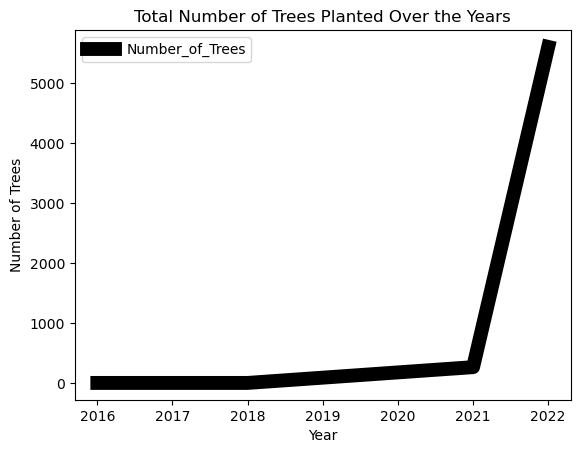

In [34]:
trees['Number_of_Trees']=1
time_data=trees.query("completed_date != 'Pending'")
table = pd.pivot_table(time_data, values=['Number_of_Trees'], index=['completed_year'], aggfunc=sum)
table.plot(color='black', linewidth=10)
plt.title('Total Number of Trees Planted Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Trees')

We can see here that a clear effort has been made to plant more trees overall in the boroughs of NYC. The sharp increase in the recent year is particularly notable. The increase in planted trees in NYC between 2021-2022 (within just one year)  is a very sharp one given the very short period of they managed to plant them.

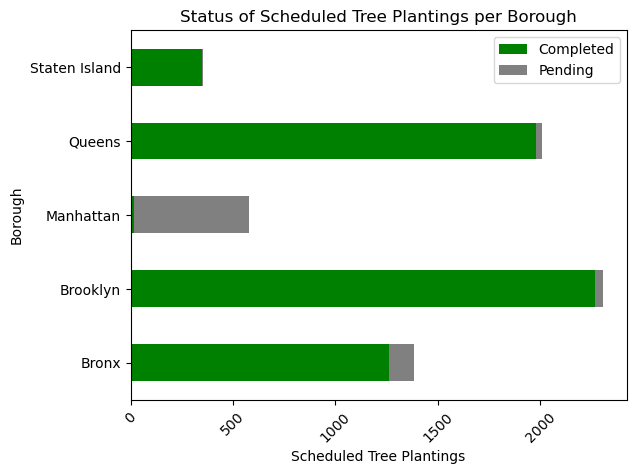

In [35]:
stacked=trees.groupby(['borough', 'wo_status'])['Number_of_Trees'].count()

stacked=stacked.to_frame().reset_index()
stacked=stacked.pivot(index='borough', columns='wo_status').reset_index()
stacked.plot.barh(x='borough', stacked=True, title='Status of Scheduled Tree Plantings per Borough', color=['green', 'gray'])
plt.legend()
plt.ylabel('Borough')
plt.xlabel('Scheduled Tree Plantings')
plt.legend(['Completed', 'Pending'])
plt.xticks(rotation=45)
plt.show()


We observe that four of the five boroughs in NYC have a status of completed scheduled tree plantings. Interestingly, nearly all of Manhattan’s scheduled plantings are still pending. Possible reasons why they still might be pending could be due to Manhattan being downtown.


In [36]:
stacked

borough Number_of_Trees              
wo_status                      Completed Not Completed
0                  Bronx            1259           123
1               Brooklyn            2266            39
2              Manhattan              17           563
3                 Queens            1977            29
4          Staten Island             350             3

In [37]:
trees['lng'].value_counts()

-74.085588    2
-73.841722    2
-74.099723    2
-73.935221    2
-73.888554    2
             ..
-74.037779    1
-74.037818    1
-74.030418    1
-74.030874    1
-73.972553    1
Name: lng, Length: 6616, dtype: int64

<AxesSubplot:>

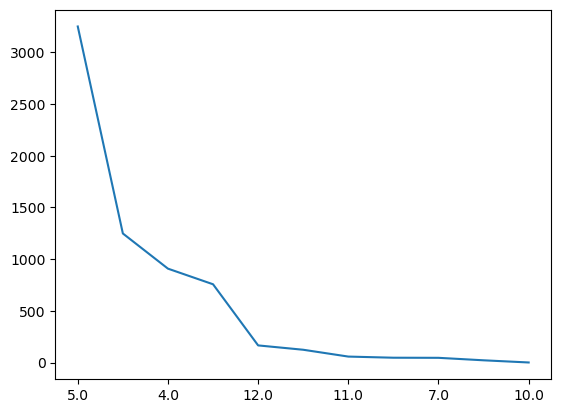

In [38]:
trees["completed_month"].value_counts().plot(kind='line')

In [39]:
#density=time_data.groupby(['borough'])["count"].count().plot()


<AxesSubplot:xlabel='borough'>

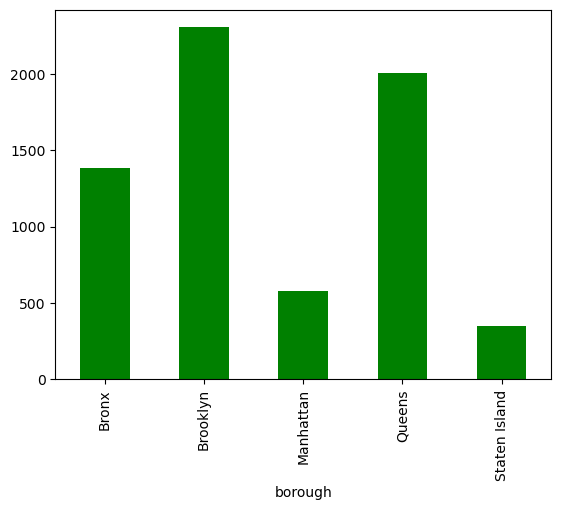

In [40]:
trees.groupby(['borough'])['tree_id'].count().plot(kind='bar', color="green")



We can see that Brooklyn and Queens appear to be greener, but for further analysis, lets look at completed vs not completed

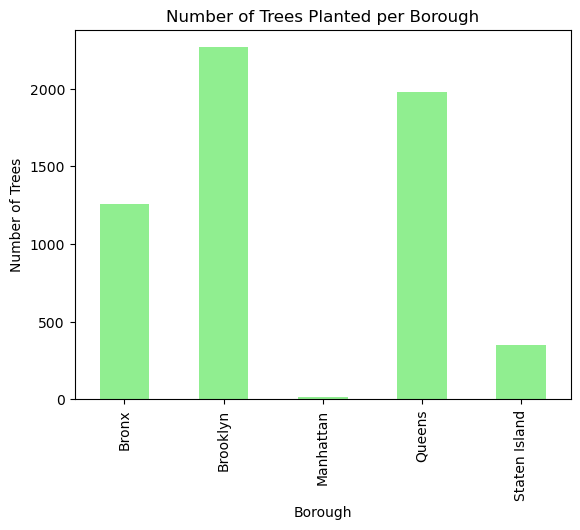

In [41]:
completed_tp= trees.query("wo_status == 'Completed'")
pending_tp=trees.query("wo_status == 'Not Completed'")
completed_tp.groupby(['borough'])['tree_id'].count().plot(kind='bar', color='lightgreen')
plt.title('Number of Trees Planted per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trees')
plt.show()

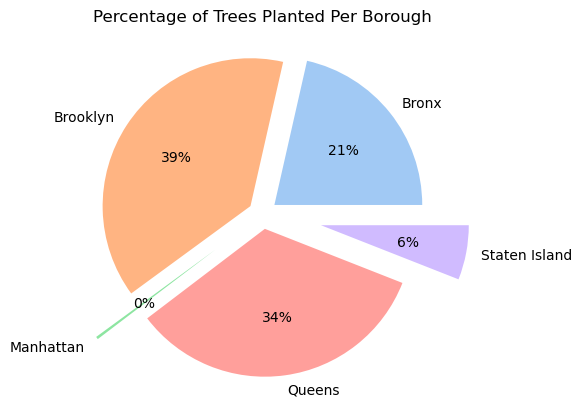

In [42]:
explode = (0.1, 0.1, 0.4, 0.1, 0.4)
data = [1259, 2266, 17, 1977, 350]
keys = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
palette_color = sns.color_palette('pastel')
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.title('Percentage of Trees Planted Per Borough')
plt.show()

Note here Manhattan has nearly 0% of completed scheduled Trees planted.

Text(0.5, 1.0, 'Number of Trees Pending to be Planted')

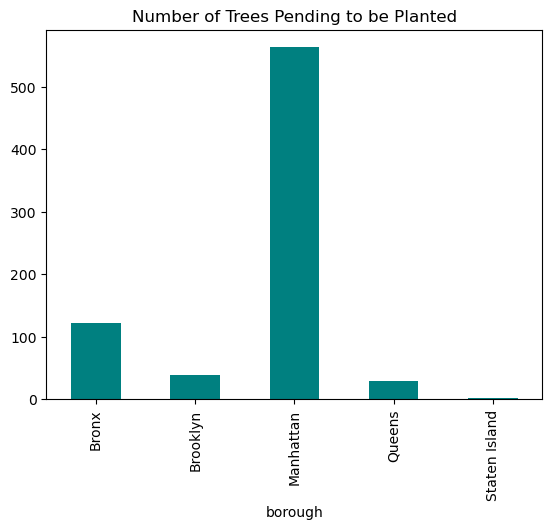

In [43]:
pending_tp.groupby(['borough'])['tree_id'].count().plot(kind='bar', color='teal')
plt.title('Number of Trees Pending to be Planted')

In [44]:
completed_tp

,lng,lat,borough,zipcode,building_number,street_name,planting_space_id,community_board,city_council,tree_id,wo_id,wo_status,completed_date,completed_month,completed_year,Number_of_Trees
0,-73.709503,40.740340,Queens,11004,82-030,260 STREET,148027,413,23,114029,15525248,Completed,2021-12-07 00:00:00,12.0,2021.0,1
2,-73.712984,40.735428,Queens,11001,254-04,84 ROAD,177638,413,23,142438,8573730,Completed,2021-12-07 00:00:00,12.0,2021.0,1
4,-73.894586,40.729696,Queens,11378,69-26,53 DRIVE,200074,405,30,163302,6529475,Completed,2022-05-25 00:00:00,5.0,2022.0,1
15,-74.008180,40.674696,Brooklyn,0,34,LORRAINE STREET,277994,306,0,5025412,8617279,Completed,2021-04-27 00:00:00,4.0,2021.0,1
17,-74.016429,40.676310,Brooklyn,11231,252,CONOVER STREET,279250,306,38,5663128,637906,Completed,2021-04-27 00:00:00,4.0,2021.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,-73.840153,40.868989,Bronx,10469,2920,KINGSLAND AVENUE,8396552,212,12,13160803,14343965,Completed,2022-06-24 00:00:00,6.0,2022.0,1
8065,-73.962095,40.576282,Brooklyn,11235,3121,BRIGHTON 5 STREET,9410265,313,48,13026728,17073001,Completed,2022-05-27 00:00:00,5.0,2022.0,1
8072,-73.972447,40.635820,Brooklyn,11218,507,OCEAN PKWY,8356056,312,39,12839650,14250319,Completed,2022-04-28 00:00:00,4.0,2022.0,1
8073,-73.972372,40.635382,Brooklyn,11218,535,OCEAN PARKWAY,1219011,312,39,12837853,14250323,Completed,2022-04-28 00:00:00,4.0,2022.0,1


In [45]:
gdf = geopandas.GeoDataFrame(completed_tp, geometry=geopandas.points_from_xy(completed_tp['lng'], completed_tp['lat']))
gdf

,lng,lat,borough,zipcode,building_number,street_name,planting_space_id,community_board,city_council,tree_id,wo_id,wo_status,completed_date,completed_month,completed_year,Number_of_Trees,geometry
0,-73.709503,40.740340,Queens,11004,82-030,260 STREET,148027,413,23,114029,15525248,Completed,2021-12-07 00:00:00,12.0,2021.0,1,POINT (-73.70950 40.74034)
2,-73.712984,40.735428,Queens,11001,254-04,84 ROAD,177638,413,23,142438,8573730,Completed,2021-12-07 00:00:00,12.0,2021.0,1,POINT (-73.71298 40.73543)
4,-73.894586,40.729696,Queens,11378,69-26,53 DRIVE,200074,405,30,163302,6529475,Completed,2022-05-25 00:00:00,5.0,2022.0,1,POINT (-73.89459 40.72970)
15,-74.008180,40.674696,Brooklyn,0,34,LORRAINE STREET,277994,306,0,5025412,8617279,Completed,2021-04-27 00:00:00,4.0,2021.0,1,POINT (-74.00818 40.67470)
17,-74.016429,40.676310,Brooklyn,11231,252,CONOVER STREET,279250,306,38,5663128,637906,Completed,2021-04-27 00:00:00,4.0,2021.0,1,POINT (-74.01643 40.67631)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,-73.840153,40.868989,Bronx,10469,2920,KINGSLAND AVENUE,8396552,212,12,13160803,14343965,Completed,2022-06-24 00:00:00,6.0,2022.0,1,POINT (-73.84015 40.86899)
8065,-73.962095,40.576282,Brooklyn,11235,3121,BRIGHTON 5 STREET,9410265,313,48,13026728,17073001,Completed,2022-05-27 00:00:00,5.0,2022.0,1,POINT (-73.96210 40.57628)
8072,-73.972447,40.635820,Brooklyn,11218,507,OCEAN PKWY,8356056,312,39,12839650,14250319,Completed,2022-04-28 00:00:00,4.0,2022.0,1,POINT (-73.97245 40.63582)
8073,-73.972372,40.635382,Brooklyn,11218,535,OCEAN PARKWAY,1219011,312,39,12837853,14250323,Completed,2022-04-28 00:00:00,4.0,2022.0,1,POINT (-73.97237 40.63538)


In [46]:
trees["num_trees"]=trees.groupby

In [47]:
tree_map_info=trees[['lat', 'lng','zipcode', 'street_name', 'borough', 'tree_id']]
completed_tp.groupby(['borough'])['tree_id'].count()

    


borough
Bronx            1259
Brooklyn         2266
Manhattan          17
Queens           1977
Staten Island     350
Name: tree_id, dtype: int64

In [48]:
tree_map_info['count']=1
tree_map_info

C:\Users\dsaad\AppData\Local\Temp\ipykernel_8944\3214101131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_map_info['count']=1


,lat,lng,zipcode,street_name,borough,tree_id,count
0,40.740340,-73.709503,11004,260 STREET,Queens,114029,1
2,40.735428,-73.712984,11001,84 ROAD,Queens,142438,1
3,40.815443,-73.957912,0,DR M L KING JR BOULEVARD,Manhattan,183762,1
4,40.729696,-73.894586,11378,53 DRIVE,Queens,163302,1
6,40.799678,-73.952187,10026,MALCOLM X BOULEVARD,Manhattan,143233,1
...,...,...,...,...,...,...,...
8069,40.764713,-73.961208,10065,EAST 66 STREET,Manhattan,4815051,1
8071,40.617715,-73.914545,11234,AVENUE T,Brooklyn,13171478,1
8072,40.635820,-73.972447,11218,OCEAN PKWY,Brooklyn,12839650,1
8073,40.635382,-73.972372,11218,OCEAN PARKWAY,Brooklyn,12837853,1


# Mapping 

In [49]:
# view latitude, longitude and count columns, groupby latitude and longitude summing up total for each xy coordinate
df2 = pd.DataFrame(
    tree_map_info.groupby(['borough', 'lat', 'lng'])['count'].sum().sort_values(ascending=False))

# create list of lat/long for input into folium HeatMap
lst = df2.groupby(
    ['lat', 'lng'])['count'].sum().reset_index().values.tolist()
lst
df2["count"].value_counts()


1    6610
2       8
Name: count, dtype: int64

In [57]:
print('This is just a trial run-not used in final analysis')
from folium import plugins
tree_map_info = geopandas.GeoDataFrame(gdf[['lat', 'lng', 'geometry', 'zipcode', 'street_name']], geometry=gdf['geometry'])
map = folium.Map(location = [40.7,74], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in tree_map_info.geometry ]

#heat_data
plugins.HeatMap(heat_data).add_to(map)
map

This is just a trial run-not used in final analysis


In [56]:
print("This is the interactive map selected for landing site")
from folium.plugins import HeatMap
HeatMap(data=lst, radius=12).add_to(map)
map

This is the interactive map selected for landing site


This heat map displays the density of street trees planted across the different boroughs of NYC. We see that the areas that have higher densities are marked by the more orange-red colors and the lower densities are characterized by the cooler greens and blues.The user can utilize the zoom in and out feature to view the densities in more specific regions of those boroughs. 


In [51]:
from folium import plugins
tree_map_info = geopandas.GeoDataFrame(gdf[['lat', 'lng', 'geometry', 'zipcode', 'street_name']], geometry=gdf['geometry'])
map = folium.Map(location = [40.7,74], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in tree_map_info.geometry ]

#heat_data
plugins.HeatMap(heat_data).add_to(map)
map

In [58]:
boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')

C:\Users\dsaad\anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:1310: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(
C:\Users\dsaad\anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:1310: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\dsaad\anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

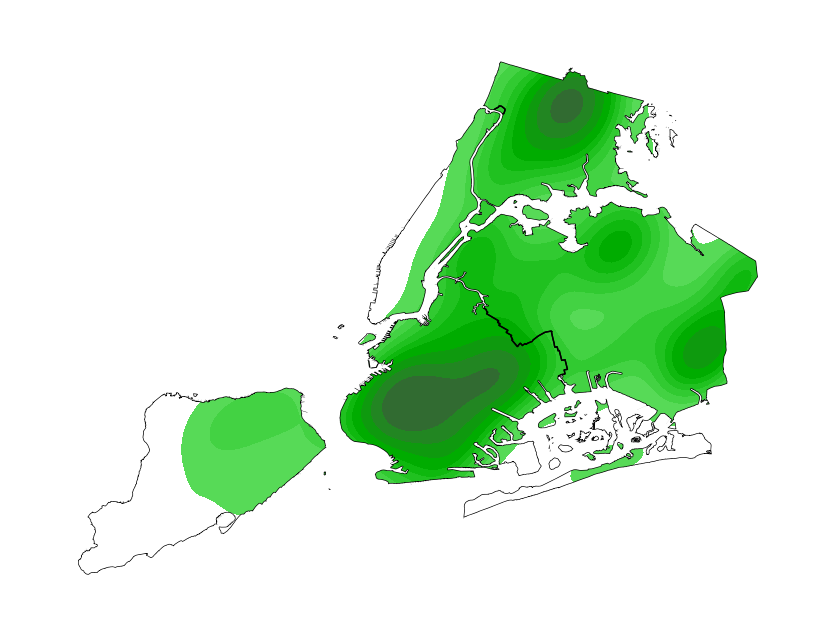

In [59]:
ax= geoplot.kdeplot(gdf,figsize=(12,8), shade=True, color='green',shade_lowest=False,clip=boroughs.geometry)
geoplot.polyplot(boroughs,ax=ax,zorder=1,edgecolor= 'black')


C:\Users\dsaad\anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:1310: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(
C:\Users\dsaad\anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:1310: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\dsaad\anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

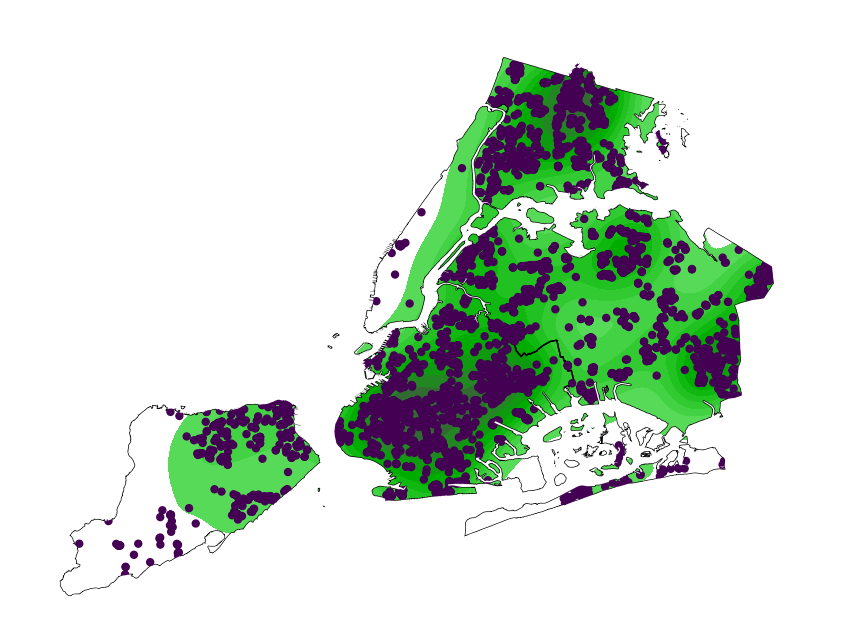

In [60]:
ax= geoplot.kdeplot(gdf,figsize=(12,8), shade=True, color='green',shade_lowest=False,clip=boroughs.geometry)
geoplot.polyplot(boroughs,ax=ax,zorder=1,edgecolor= 'black')
static_map= geoplot.pointplot(
    gdf,
    hue='Number_of_Trees',
    ax=ax)
static_map

Here, each black point represents a planted tree, so we can clearly see that the density of trees planted are concentrated more towards the Brooklyn borough area. As we can see, the dots become more dispersed as we move further away from Brooklyn. We see that the Manhattan strip is almost clear.

# Conclusion
Street Tree Planting in NYC and other heavily urban areas creates a more liveable environment as planting trees can remove air pollutants, reduce CO2 emissions and keep the city cooler during the summer. Based on the analysis, the implementation of planting a considerable number of trees (over 6,000!)  in NYC was not only a relatively quick one but also effective, as we note that the status of the majority of tree plantings have been successfully executed. 

On the other hand, it also raises questions about why for instance, why areas like Manhattan might be more resistant to this greener implementation. Perhaps there are certain areas that might be too urban to accommodate a greener environment. A secondary exploration of how these newly planted trees might improve or change urban life can also be useful in determining whether or not city governments should invest in these types of greener programs. These are questions for future projects that might want to explore these factors on a deeper level. 


